In [13]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
consumerkey='cZ6vrfi5xN7a0bJYSWzxVgHt4'
consumersecret='EuodJCHst8xTo75QXRicsZw8h1vG1SM8TomPevReX3v8u0nhHO'
accesstoken='1374457787896401921-4ildIH69y1WJdKa4pTSG1mgac3ITCx'
accesskey='jW3Zi9iw1mdHziYk5bf0hnb4L4ASVQ5bh24EYIVqH1OeY'

In [4]:
#authentication object
authenticate = tweepy.OAuthHandler(consumer_key=consumerkey,consumer_secret=consumersecret)

#access token
authenticate.set_access_token(accesstoken, accesskey)

#creating api object
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [5]:
#extract 100 tweets from tweeter user
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

#print last 5 tweets from above account
print("5 recent tweets: \n")
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

5 recent tweets: 

Here are five things you should know if you want to understand how variants are (and aren’t) complicating the pandemic. https://t.co/rANiDcZynJ

RT @IFPRI: 💡 From #climateadaptation to #genderequality, discover @CGIAR’s 50 years of innovations that changed the world 🌎 🎉: https://t.co…

The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big: https://t.co/jFWTPyaOAq https://t.co/PR5sxI7aDt

I had a great time answering questions about my new book, climate change, and COVID-19 on @reddit last week. Here’s a recap of the conversation. https://t.co/Kvd2blqXkL

RT @WHO: It's #WorldTBDay

Even as we battle #COVID19, we must not ease up the fight against #Tuberculosis, which remains the 🌎🌍🌏’s deadlie…



In [6]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Here are five things you should know if you wa...
1,RT @IFPRI: 💡 From #climateadaptation to #gende...
2,The technological transformation we need to ad...
3,I had a great time answering questions about m...
4,RT @WHO: It's #WorldTBDay\n\nEven as we battle...


# cleaning the text

In [7]:
def clean_txt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S','',text)
  return text

In [8]:
df['Tweets'] = df['Tweets'].apply(clean_txt)
df

,Tweets
0,Here are five things you should know if you wa...
1,": 💡 From climateadaptation to genderequality, ..."
2,The technological transformation we need to ad...
3,I had a great time answering questions about m...
4,: It's WorldTBDay\n\nEven as we battle COVID19...
...,...
95,This the most important thing the U.S. can do ...
96,I’m inspired by Quarraisha Abdool Karim and . ...
97,: My parents taught me to leave the world bett...
98,I’m a big fan of author _yuval and was excited...


In [10]:
# creating the function to get the subjectivity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity


# creating function to get the polarity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

# creating two new columns

df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df

,Tweets,Subjectivity,Polarity
0,Here are five things you should know if you wa...,0.000000,0.000000
1,": 💡 From climateadaptation to genderequality, ...",0.000000,0.000000
2,The technological transformation we need to ad...,0.425000,0.425000
3,I had a great time answering questions about m...,0.423737,0.312121
4,: It's WorldTBDay\n\nEven as we battle COVID19...,0.000000,0.000000
...,...,...,...
95,This the most important thing the U.S. can do ...,0.750000,0.450000
96,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000
97,: My parents taught me to leave the world bett...,0.500000,0.500000
98,I’m a big fan of author _yuval and was excited...,0.533333,0.208333


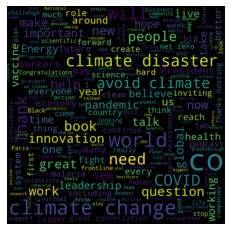

In [21]:
# plotting word cloud
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(background_color='black',mode="RGB", width=800, height=800, random_state=21, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# function to compute positive,negative,neutral analysis

def get_analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis'] = df['Polarity'].apply(get_analysis)


df

,Tweets,Subjectivity,Polarity,Analysis
0,Here are five things you should know if you wa...,0.000000,0.000000,Neutral
1,": 💡 From climateadaptation to genderequality, ...",0.000000,0.000000,Neutral
2,The technological transformation we need to ad...,0.425000,0.425000,Positive
3,I had a great time answering questions about m...,0.423737,0.312121,Positive
4,: It's WorldTBDay\n\nEven as we battle COVID19...,0.000000,0.000000,Neutral
...,...,...,...,...
95,This the most important thing the U.S. can do ...,0.750000,0.450000,Positive
96,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000,Positive
97,: My parents taught me to leave the world bett...,0.500000,0.500000,Positive
98,I’m a big fan of author _yuval and was excited...,0.533333,0.208333,Positive


In [25]:
# print all positive tweets

j = 1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'):
    print(str(j)+') '+sortedDf['Tweets'][i])
    print()
    j += 1

1) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big: .co/jFWTPyaOAq .co/PR5sxI7aDt

2) I had a great time answering questions about my new book, climate change, and COVID-19 on  last week. Here’s a recap of the conversation. .co/Kvd2blqXkL

3) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 11:15: .co/HXMsI0lSK1 .co/SQ4N1MlxGO

4) I named my book “How to Avoid a Climate Disaster,” not “How to Stop Climate Change,” because our climate is already changing—and no one will be hurt more by climate change than the world’s poorest people. Here's how we can help them adapt. .co/9mLJUpYErv

5) Congratulations  on this important role. I’m excited to see what you and the Earth Fund will achieve. Avoiding a climate disaster is going to take all of us, and I’m grate

In [27]:
# printing negative tweeets

j=1
sortedDf = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['Analysis'][i] == 'Negative'):
    print(str(j)+') '+sortedDf['Tweets'][i])
    print()
    j += 1

1) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects: .co/XciR3lIVzs .co/Y2do5GhsGx

2) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

3) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. .co/X5okWwpBbX

4) : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

5) Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. .co/eO4eKSDRn0

6) There are several ways individuals can help

In [28]:
# printing neutral tweeets

j=1
sortedDf = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['Analysis'][i] == 'Neutral'):
    print(str(j)+') '+sortedDf['Tweets'][i])
    print()
    j += 1

1) Here are five things you should know if you want to understand how variants are (and aren’t) complicating the pandemic. .co/rANiDcZynJ

2) : 💡 From climateadaptation to genderequality, discover ’s 50 years of innovations that changed the world 🌎 🎉: .co…

3) : It's WorldTBDay

Even as we battle COVID19, we must not ease up the fight against Tuberculosis, which remains the 🌎🌍🌏’s deadlie…

4) I’m answering your questions now on : .co/HXMsI0lSK1 .co/XG7eAMNrGM

5) After you finish your pancakes this morning, come ask me anything on  at 11:15 Pacific Time: .co/R3wfDhtqxD .co/fAPRPUWQtu

6) : Speaking from villages, riverbanks and rural clinics, frontline health workers and malaria volunteers share stories of what…

7)   Thank you for your partnership, , and for sharing what all of us can do to avoid a climate disaster.

8) When I talk to people about climate change, I almost always get asked the same question: What can I do to help? Here are some actions individuals can take to move us c

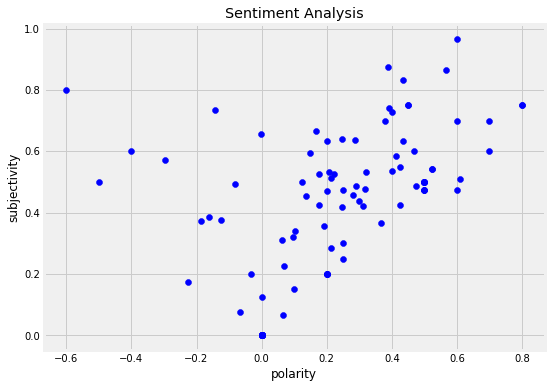

In [29]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, sortedDf.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [34]:
ptweets = df[df['Analysis'] == 'Positive']
ptweets = ptweets['Tweets']
ptweets

2     The technological transformation we need to ad...
3     I had a great time answering questions about m...
6     In this video, I answered some really good que...
10    I named my book “How to Avoid a Climate Disast...
11    Congratulations  on this important role. I’m e...
                            ...                        
95    This the most important thing the U.S. can do ...
96    I’m inspired by Quarraisha Abdool Karim and . ...
97    : My parents taught me to leave the world bett...
98    I’m a big fan of author _yuval and was excited...
99    : “I will continue fighting. I will continue s...
Name: Tweets, Length: 71, dtype: object

In [36]:
round((ptweets.shape[0]/df.shape[0])*100, 1)

71.0

In [37]:
ntweets = df[df['Analysis'] == 'Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100, 1)

13.0

In [38]:
nutweets = df[df['Analysis'] == 'Neutral']
nutweets = nutweets['Tweets']
round((nutweets.shape[0]/df.shape[0])*100, 1)

16.0

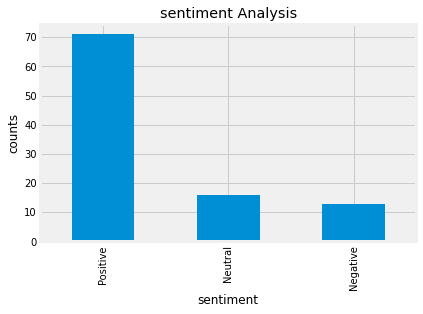

In [39]:
df['Analysis'].value_counts()

plt.title("sentiment Analysis")
plt.xlabel('sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()